# Introduction

In this project, you will build a neural network of your own design to evaluate the MNIST dataset.

Some of the benchmark results on MNIST include can be found [on Yann LeCun's page](https://webcache.googleusercontent.com/search?q=cache:stAVPik6onEJ:yann.lecun.com/exdb/mnist) and include:

88% [Lecun et al., 1998](https://hal.science/hal-03926082/document)

95.3% [Lecun et al., 1998](https://hal.science/hal-03926082v1/document)

99.65% [Ciresan et al., 2011](http://people.idsia.ch/~juergen/ijcai2011.pdf)


MNIST is a great dataset for sanity checking your models, since the accuracy levels achieved by large convolutional neural networks and small linear models are both quite high. This makes it important to be familiar with the data.

## Installation

In [1]:
# Update the PATH to include the user installation directory.
import os
os.environ['PATH'] = f"{os.environ['PATH']}:/root/.local/bin"

# Restart the Kernel before you move on to the next step.

#### Important: Restart the Kernel before you move on to the next step.

In [2]:
# Install requirements
!python -m pip install -r requirements.txt

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 89.2/89.2 MB 5.6 MB/s eta 0:00:00
  error: subprocess-exited-with-error
  
  × pip subprocess to install build dependencies did not run successfully.
  │ exit code: 1
  ╰─> See above for output.
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  Installing build dependencies ... error
error: subprocess-exited-with-error

× pip subprocess to install build dependencies did not run successfully.
│ exit code: 1
╰─> See above for output.

note: This error originates from a subprocess, and is likely not a problem with pip.


## Imports

In [3]:
## This cell contains the essential imports you will need – DO NOT CHANGE THE CONTENTS! ##
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
import numpy as np

## Load the Dataset

Specify your transforms as a list if you intend to .
The transforms module is already loaded as `transforms`.

MNIST is fortunately included in the torchvision module.
Then, you can create your dataset using the `MNIST` object from `torchvision.datasets` ([the documentation is available here](https://pytorch.org/vision/stable/datasets.html#mnist)).
Make sure to specify `download=True`!

Once your dataset is created, you'll also need to define a `DataLoader` from the `torch.utils.data` module for both the train and the test set.

In [4]:
# Define transforms
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5,), (0.5,))
])

# Create training set and define training dataloader
trainset = torchvision.datasets.MNIST(root='./data', train=True, download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=64, shuffle=True)

# Create test set and define test dataloader
testset = torchvision.datasets.MNIST(root='./data', train=False, download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=64, shuffle=False)


Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 9912422/9912422 [00:00<00:00, 30272128.67it/s]


Extracting ./data/MNIST/raw/train-images-idx3-ubyte.gz to ./data/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 28881/28881 [00:00<00:00, 1107404.85it/s]


Extracting ./data/MNIST/raw/train-labels-idx1-ubyte.gz to ./data/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 1648877/1648877 [00:00<00:00, 9659983.62it/s]


Extracting ./data/MNIST/raw/t10k-images-idx3-ubyte.gz to ./data/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 4542/4542 [00:00<00:00, 6983331.66it/s]

Extracting ./data/MNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/MNIST/raw



## Justify your preprocessing

In your own words, why did you choose the transforms you chose? If you didn't use any preprocessing steps, why not?

**DOUBLE CLICK THIS CELL TO MODIFY**

## Explore the Dataset
Using matplotlib, numpy, and torch, explore the dimensions of your data.

You can view images using the `show5` function defined below – it takes a data loader as an argument.
Remember that normalized images will look really weird to you! You may want to try changing your transforms to view images.
Typically using no transforms other than `toTensor()` works well for viewing – but not as well for training your network.
If `show5` doesn't work, go back and check your code for creating your data loaders and your training/test sets.

In [5]:
## This cell contains a function for showing 5 images from a dataloader – DO NOT CHANGE THE CONTENTS! ##
def show5(img_loader):
    dataiter = iter(img_loader)

    batch = next(dataiter)
    labels = batch[1][0:5]
    images = batch[0][0:5]
    for i in range(5):
        print(int(labels[i].detach()))

        image = images[i].numpy()
        plt.imshow(image.T.squeeze().T)
        plt.show()

Size of training set: 60000
Size of test set: 10000
Shape of one image: torch.Size([1, 28, 28])


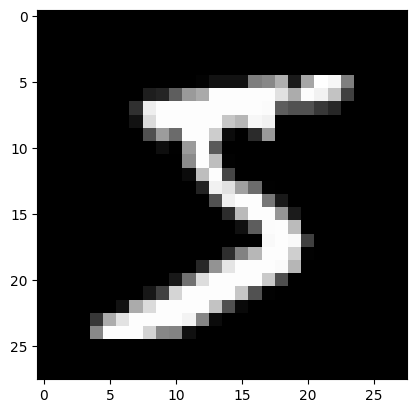

In [6]:
# Explore data
# Print size of training and test sets
print("Size of training set:", len(trainset))
print("Size of test set:", len(testset))

# Print shape of one image
image, label = trainset[0]
print("Shape of one image:", image.shape)

# Visualize one image
plt.imshow(image.squeeze(), cmap='gray')
plt.show()


## Build your Neural Network
Using the layers in `torch.nn` (which has been imported as `nn`) and the `torch.nn.functional` module (imported as `F`), construct a neural network based on the parameters of the dataset.
Use any architecture you like.

*Note*: If you did not flatten your tensors in your transforms or as part of your preprocessing and you are using only `Linear` layers, make sure to use the `Flatten` layer in your network!

In [7]:
# Build your Neural Network
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.conv1 = nn.Conv2d(1, 32, 3)
        self.conv2 = nn.Conv2d(32, 64, 3)
        self.pool = nn.MaxPool2d(2, 2)
        self.fc1 = nn.Linear(64 * 5 * 5, 128)
        self.fc2 = nn.Linear(128, 10)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = x.view(-1, 64 * 5 * 5)
        x = F.relu(self.fc1(x))
        x = self.fc2(x)
        return x

net = Net()


Specify a loss function and an optimizer, and instantiate the model.

If you use a less common loss function, please note why you chose that loss function in a comment.

In [8]:
# Specify loss function and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=0.001, momentum=0.9)


## Running your Neural Network
Use whatever method you like to train your neural network, and ensure you record the average loss at each epoch.
Don't forget to use `torch.device()` and the `.to()` method for both your model and your data if you are using GPU!

If you want to print your loss **during** each epoch, you can use the `enumerate` function and print the loss after a set number of batches. 250 batches works well for most people!

In [9]:
# Running your Neural Network
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
net.to(device)

num_epochs = 10
train_losses = []

for epoch in range(num_epochs):
    running_loss = 0.0
    for i, data in enumerate(trainloader, 0):
        inputs, labels = data[0].to(device), data[1].to(device)

        optimizer.zero_grad()

        outputs = net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()
        if i % 250 == 249:  # print every 250 mini-batches
            train_loss = running_loss / 250
            print(f'Epoch [{epoch + 1}/{num_epochs}], Batch [{i + 1}/{len(trainloader)}], Loss: {train_loss:.3f}')
            train_losses.append(train_loss)
            running_loss = 0.0

print('Finished Training')


Epoch [1/10], Batch [250/938], Loss: 2.010
Epoch [1/10], Batch [500/938], Loss: 0.692
Epoch [1/10], Batch [750/938], Loss: 0.393
Epoch [2/10], Batch [250/938], Loss: 0.264
Epoch [2/10], Batch [500/938], Loss: 0.218
Epoch [2/10], Batch [750/938], Loss: 0.196
Epoch [3/10], Batch [250/938], Loss: 0.149
Epoch [3/10], Batch [500/938], Loss: 0.146
Epoch [3/10], Batch [750/938], Loss: 0.129
Epoch [4/10], Batch [250/938], Loss: 0.106
Epoch [4/10], Batch [500/938], Loss: 0.104
Epoch [4/10], Batch [750/938], Loss: 0.101
Epoch [5/10], Batch [250/938], Loss: 0.093
Epoch [5/10], Batch [500/938], Loss: 0.087
Epoch [5/10], Batch [750/938], Loss: 0.079
Epoch [6/10], Batch [250/938], Loss: 0.077
Epoch [6/10], Batch [500/938], Loss: 0.073
Epoch [6/10], Batch [750/938], Loss: 0.073
Epoch [7/10], Batch [250/938], Loss: 0.072
Epoch [7/10], Batch [500/938], Loss: 0.066
Epoch [7/10], Batch [750/938], Loss: 0.065
Epoch [8/10], Batch [250/938], Loss: 0.061
Epoch [8/10], Batch [500/938], Loss: 0.060
Epoch [8/10

Plot the training loss (and validation loss/accuracy, if recorded).

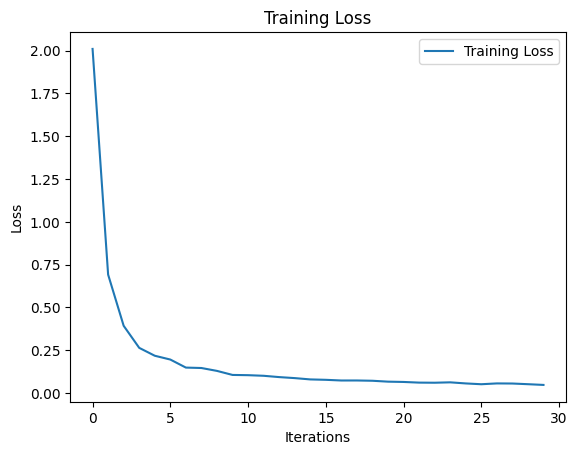

In [10]:
# Plot the training loss
plt.plot(train_losses, label='Training Loss')
plt.xlabel('Iterations')
plt.ylabel('Loss')
plt.title('Training Loss')
plt.legend()
plt.show()


## Testing your model
Using the previously created `DataLoader` for the test set, compute the percentage of correct predictions using the highest probability prediction.

If your accuracy is over 90%, great work, but see if you can push a bit further!
If your accuracy is under 90%, you'll need to make improvements.
Go back and check your model architecture, loss function, and optimizer to make sure they're appropriate for an image classification task.

In [11]:
# Testing your model
correct = 0
total = 0
with torch.no_grad():
    for data in testloader:
        images, labels = data[0].to(device), data[1].to(device)
        outputs = net(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

accuracy = 100 * correct / total
print(f'Accuracy on the test set: {accuracy:.2f}%')


Accuracy on the test set: 98.55%


## Improving your model

Once your model is done training, try tweaking your hyperparameters and training again below to improve your accuracy on the test set!

In [12]:
# Adjusting hyperparameters
num_epochs = 15  # Increase number of epochs
optimizer = optim.Adam(net.parameters(), lr=0.001)  # Change optimizer to Adam for better convergence

train_losses = []
test_losses = []
test_accuracy = []

# Training loop
for epoch in range(num_epochs):
    running_loss = 0.0
    for i, data in enumerate(trainloader, 0):
        inputs, labels = data[0].to(device), data[1].to(device)

        optimizer.zero_grad()

        outputs = net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()

    # Compute training loss
    train_loss = running_loss / len(trainloader)
    train_losses.append(train_loss)

    # Compute test loss and accuracy
    test_loss = 0.0
    correct = 0
    total = 0
    with torch.no_grad():
        for data in testloader:
            images, labels = data[0].to(device), data[1].to(device)
            outputs = net(images)
            loss = criterion(outputs, labels)
            test_loss += loss.item()
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()

    test_losses.append(test_loss / len(testloader))
    test_accuracy.append(correct / total)

    print(f'Epoch [{epoch + 1}/{num_epochs}], '
          f'Training Loss: {train_loss:.4f}, '
          f'Test Loss: {test_loss / len(testloader):.4f}, '
          f'Test Accuracy: {100 * correct / total:.2f}%')

print('Finished Training')


Epoch [1/15], Training Loss: 0.0713, Test Loss: 0.0620, Test Accuracy: 98.09%
Epoch [2/15], Training Loss: 0.0401, Test Loss: 0.0327, Test Accuracy: 98.95%
Epoch [3/15], Training Loss: 0.0274, Test Loss: 0.0334, Test Accuracy: 98.91%
Epoch [4/15], Training Loss: 0.0204, Test Loss: 0.0294, Test Accuracy: 99.01%
Epoch [5/15], Training Loss: 0.0163, Test Loss: 0.0276, Test Accuracy: 99.16%
Epoch [6/15], Training Loss: 0.0122, Test Loss: 0.0363, Test Accuracy: 98.91%
Epoch [7/15], Training Loss: 0.0110, Test Loss: 0.0343, Test Accuracy: 99.02%
Epoch [8/15], Training Loss: 0.0083, Test Loss: 0.0349, Test Accuracy: 99.11%
Epoch [9/15], Training Loss: 0.0084, Test Loss: 0.0340, Test Accuracy: 99.17%
Epoch [10/15], Training Loss: 0.0061, Test Loss: 0.0519, Test Accuracy: 98.85%
Epoch [11/15], Training Loss: 0.0061, Test Loss: 0.0474, Test Accuracy: 98.93%
Epoch [12/15], Training Loss: 0.0078, Test Loss: 0.0329, Test Accuracy: 99.24%
Epoch [13/15], Training Loss: 0.0043, Test Loss: 0.0392, Test

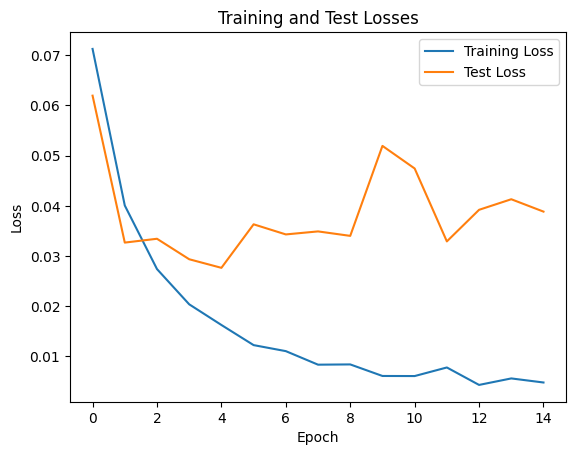

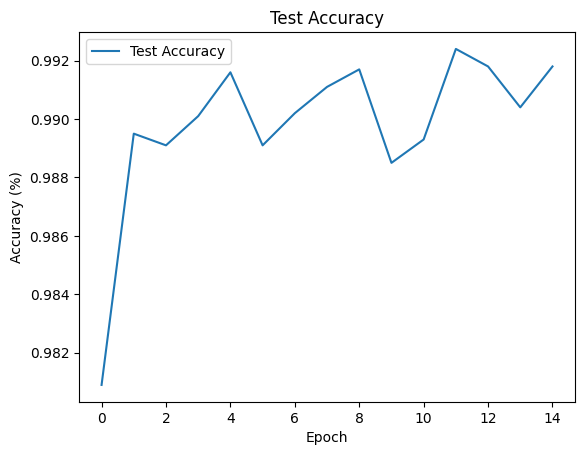

In [13]:
# Plotting training and test losses
plt.plot(train_losses, label='Training Loss')
plt.plot(test_losses, label='Test Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Test Losses')
plt.legend()
plt.show()

# Plotting test accuracy
plt.plot(test_accuracy, label='Test Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy (%)')
plt.title('Test Accuracy')
plt.legend()
plt.show()


## Saving your model
Using `torch.save`, save your model for future loading.

In [14]:
# Saving your model
torch.save(net.state_dict(), 'mnist_net.pth')
